# Install Dependencies

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import os
# os.makedirs('/content/drive/MyDrive/cods_comad_packages', exist_ok=True)

In [10]:
import sys
sys.path.append('/content/drive/MyDrive/cods_comad_packages')

In [ ]:
# !pip install qiskit --target /content/drive/MyDrive/cods_comad_packages
# !pip install qiskit-ibm-runtime --target /content/drive/MyDrive/cods_comad_packages
# !pip install qiskit[visualization] --target /content/drive/MyDrive/cods_comad_packages
# !pip install qiskit-aer --target /content/drive/MyDrive/cods_comad_packages
# !pip install docplex --target /content/drive/MyDrive/cods_comad_packages
# !pip install qiskit_optimization --target /content/drive/MyDrive/cods_comad_packages

In [11]:
import qiskit
qiskit.__version__

'1.3.1'

In [12]:
!python --version

Python 3.10.12


# Quantum Basics

The four steps to writing a quantum program using Qiskit:


1. Map the problem to a quantum-native format.
2. Transpile the circuits: Logical to Physical Mapping.
3. Execute using a quantum primitive function.
4. Analyze the results.







## Step 1: Map the problem to a quantum-native format.

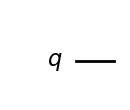

In [29]:
from qiskit import QuantumCircuit

# Create a new circuit with one qubit
qc = QuantumCircuit(1)

# Draw the Quantum Circuit
qc.draw('mpl')

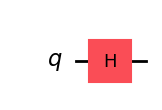

In [30]:
# Apply Hadamard Gate
qc.h(0)

qc.draw('mpl')

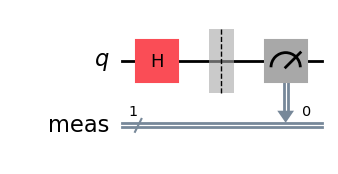

In [31]:
# Measuring the qubit

qc.measure_all()

qc.draw('mpl')

## Step 2: Transpile the circuits: Logical to Physical Mapping

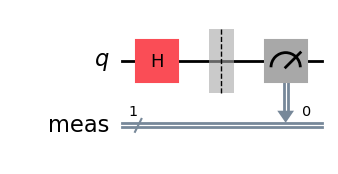

In [32]:
# Convert to an ISA circuit and layout-mapped observables.

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator

aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)

isa_circuit = pm.run(qc)

isa_circuit.draw("mpl", idle_wires=False)

In [19]:
aer_sim.num_qubits

29

In [33]:
# Run it on a simulator
from qiskit_aer.primitives import SamplerV2

shots = 100
sampler = SamplerV2()
job = sampler.run([isa_circuit], shots=shots)
result = job.result()
counts = result[0].data.meas.get_counts()
print(counts)

{'1': 58, '0': 42}


## Step3: Execute using a quantum primitive function -- Sample from the Probability Distribution

In [38]:
# Run it on a simulator
from qiskit_aer.primitives import SamplerV2

shots = 100
sampler = SamplerV2()
job = sampler.run([qc], shots=shots)
result = job.result()
counts = result[0].data.meas.get_counts()
print(counts)

{'0': 53, '1': 47}


## Step 4: Analyze the results.

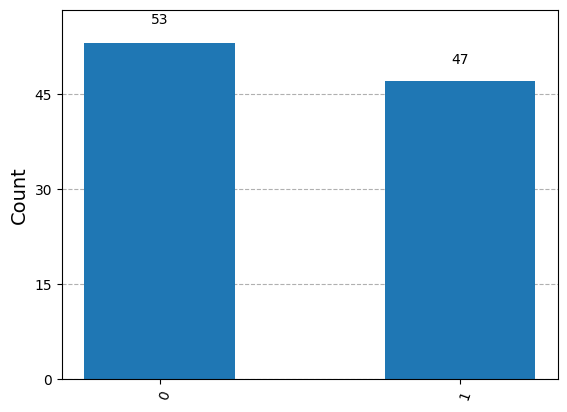

In [39]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)

## Alternative: Execute using a quantum primitive function -- Estimate the Average Value

In [40]:
# Create a new circuit with one qubit
qc = QuantumCircuit(1)

qc.draw('mpl')

qc.h(0)

from qiskit_aer.primitives import EstimatorV2
from qiskit.quantum_info import SparsePauliOp

observable = SparsePauliOp('Z')

pub = (qc,observable)

estimator = EstimatorV2()
job = estimator.run([pub])

result = job.result()

pub_result = result[0]
avg_value = pub_result.data.evs
std_div = pub_result.data.stds
print(f'Average value: {avg_value}')
print(f'Standard deviation: {std_div}')

Average value: 0.0
Standard deviation: 0.0


# Multi-Qubit Quantum Circuit and Bell State

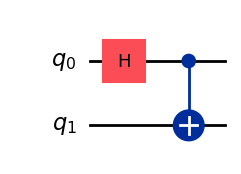

In [41]:
from qiskit import QuantumCircuit

# Create a new circuit with two qubits
qc = QuantumCircuit(2)

# Add a Hadamard gate to qubit 0
qc.h(0)

# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)


# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")

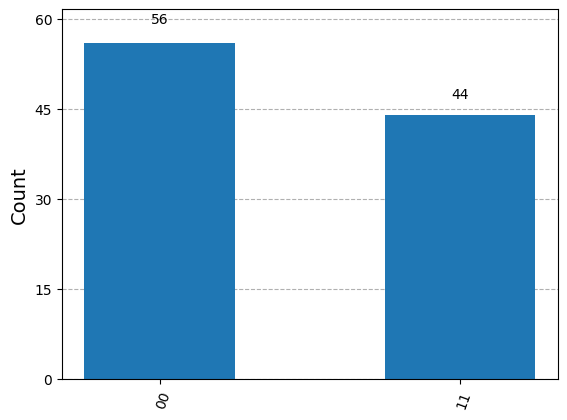

In [42]:
from qiskit_aer.primitives import SamplerV2
from qiskit.visualization import plot_histogram

qc.measure_all()

# Construct an ideal simulator with SamplerV2
sampler = SamplerV2()
job = sampler.run([qc], shots=100)

# Perform an ideal simulation
result_ideal = job.result()
counts_ideal = result_ideal[0].data.meas.get_counts()
# print('Counts(ideal):', counts_ideal)
plot_histogram(counts_ideal)

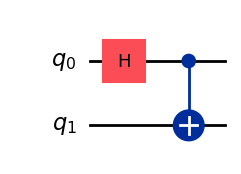

In [43]:
from qiskit import QuantumCircuit

n_qubits = 2

# Create a new circuit with two qubits
qc = QuantumCircuit(n_qubits)

# Add a Hadamard gate to qubit 0
qc.h(0)

# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)


# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")

In [44]:
from qiskit_aer.primitives import EstimatorV2
from qiskit.visualization import plot_histogram

# qc.measure_all()
observable = SparsePauliOp("Z" * n_qubits)

# Construct an ideal simulator with SamplerV2
# primitive unified bloc (pub)
pub = (qc, observable)
estimator = EstimatorV2()
job = estimator.run([pub])

# Perform an ideal simulation
result = job.result()
pub_result = result[0]
exact_value = float(pub_result.data.evs)
exact_value

1.0

# Changing Observable and Testing Correlation

In [45]:
from qiskit.quantum_info import SparsePauliOp

# Set up six different observables.
observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]

In [46]:
job = estimator.run([(qc, observables)])
result = job.result()

# This is the result of the entire submission.  You submitted one Pub,
# so this contains one inner result (and some metadata of its own).

job_result = job.result()

# This is the result from our single pub, which had five observables,
# so contains information on all five.

pub_result = job.result()[0]

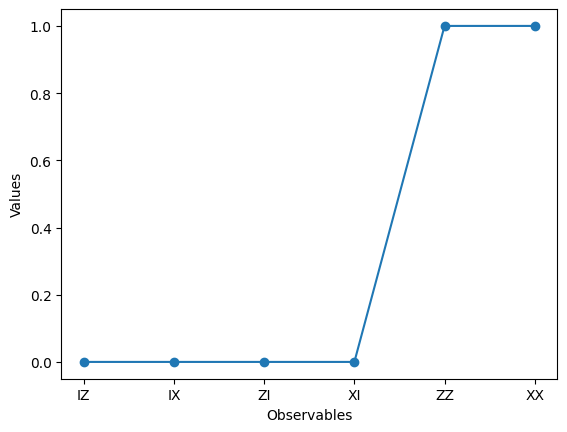

In [47]:
# Plot the result

from matplotlib import pyplot as plt

values = pub_result.data.evs

errors = pub_result.data.stds

# plotting graph
plt.plot(observables_labels, values, "-o")
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()

# Simulating on Noisy Backends

In [48]:

# Use the following code instead if you want to run on a simulator:

from qiskit_ibm_runtime import EstimatorV2 as Estimator

from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2
backend = FakeAlmadenV2()
estimator = Estimator(backend)



In [49]:
print(
    f"Name: {backend.name}\n"
    f"Version: {backend.version}\n"
    f"No. of qubits: {backend.num_qubits}\n"
)

Name: fake_almaden
Version: 2
No. of qubits: 20



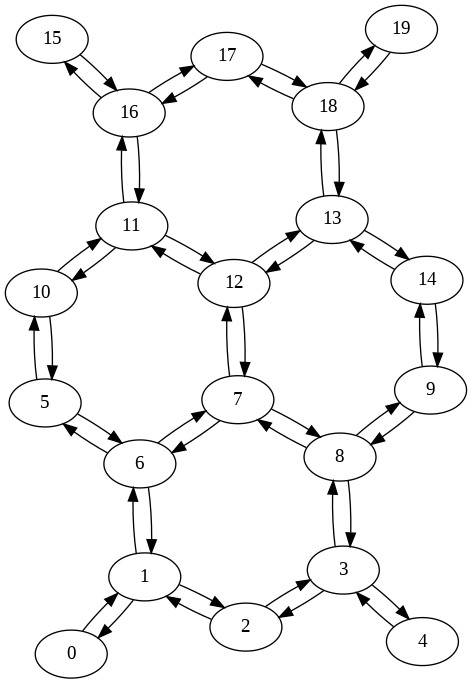

In [50]:
backend.coupling_map.draw()

## Step 1: Map the problem to a quantum-native format.

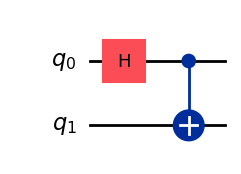

In [51]:
from qiskit import QuantumCircuit

n_qubits = 2

# Create a new circuit with two qubits
qc = QuantumCircuit(n_qubits)

# Add a Hadamard gate to qubit 0
qc.h(0)

# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)


# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")

## Step 2: Transpile the circuits: Logical to Physical Mapping

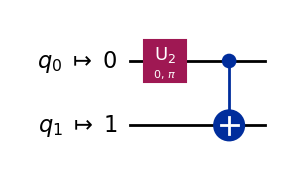

In [52]:
# Convert to an ISA circuit and layout-mapped observables.

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)

isa_circuit.draw("mpl", idle_wires=False)


## Step3: Execute using a quantum primitive function -- Estimate the Average Value

In [53]:

mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]

job = estimator.run([(isa_circuit, mapped_observables)])
result = job.result()

# This is the result of the entire submission.  You submitted one Pub,
# so this contains one inner result (and some metadata of its own).

job_result = job.result()

# This is the result from our single pub, which had five observables,
# so contains information on all five.

pub_result = job.result()[0]

## Step 4: Analyze the results.

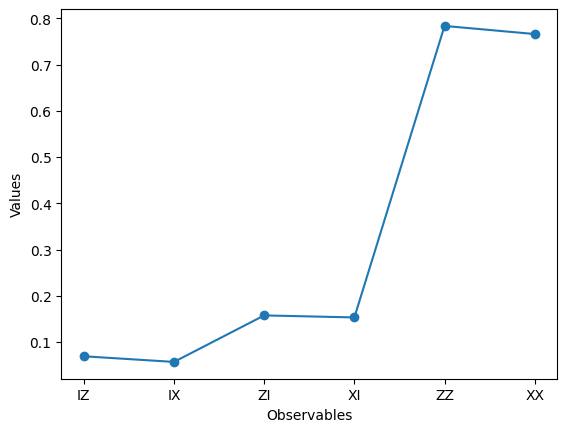

In [54]:
# Plot the result

from matplotlib import pyplot as plt

values = pub_result.data.evs

errors = pub_result.data.stds

# plotting graph
plt.plot(observables_labels, values, "-o")
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()

# Understand Available Real Hardwares

Create an Account @ https://quantum.ibm.com/

In [55]:
API_Token = "174c0f7c135aae9fd0d6c6eebd905f3d08af806347b7766d67cd6e12a7d7ef4880ec429be3fd984e73ef3eb7feaa97a7c590f7c5e04396063baa0e87af135729"
# API_Token = "<YOUR-API-TOKEN>"

In [56]:
# Initialize your account
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel="ibm_quantum", token=API_Token)

service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_sherbrooke')>]

In [57]:
backend = service.backend("ibm_sherbrooke")

print(
    f"Name: {backend.name}\n"
    f"Version: {backend.version}\n"
    f"No. of qubits: {backend.num_qubits}\n"
)

Name: ibm_sherbrooke
Version: 2
No. of qubits: 127



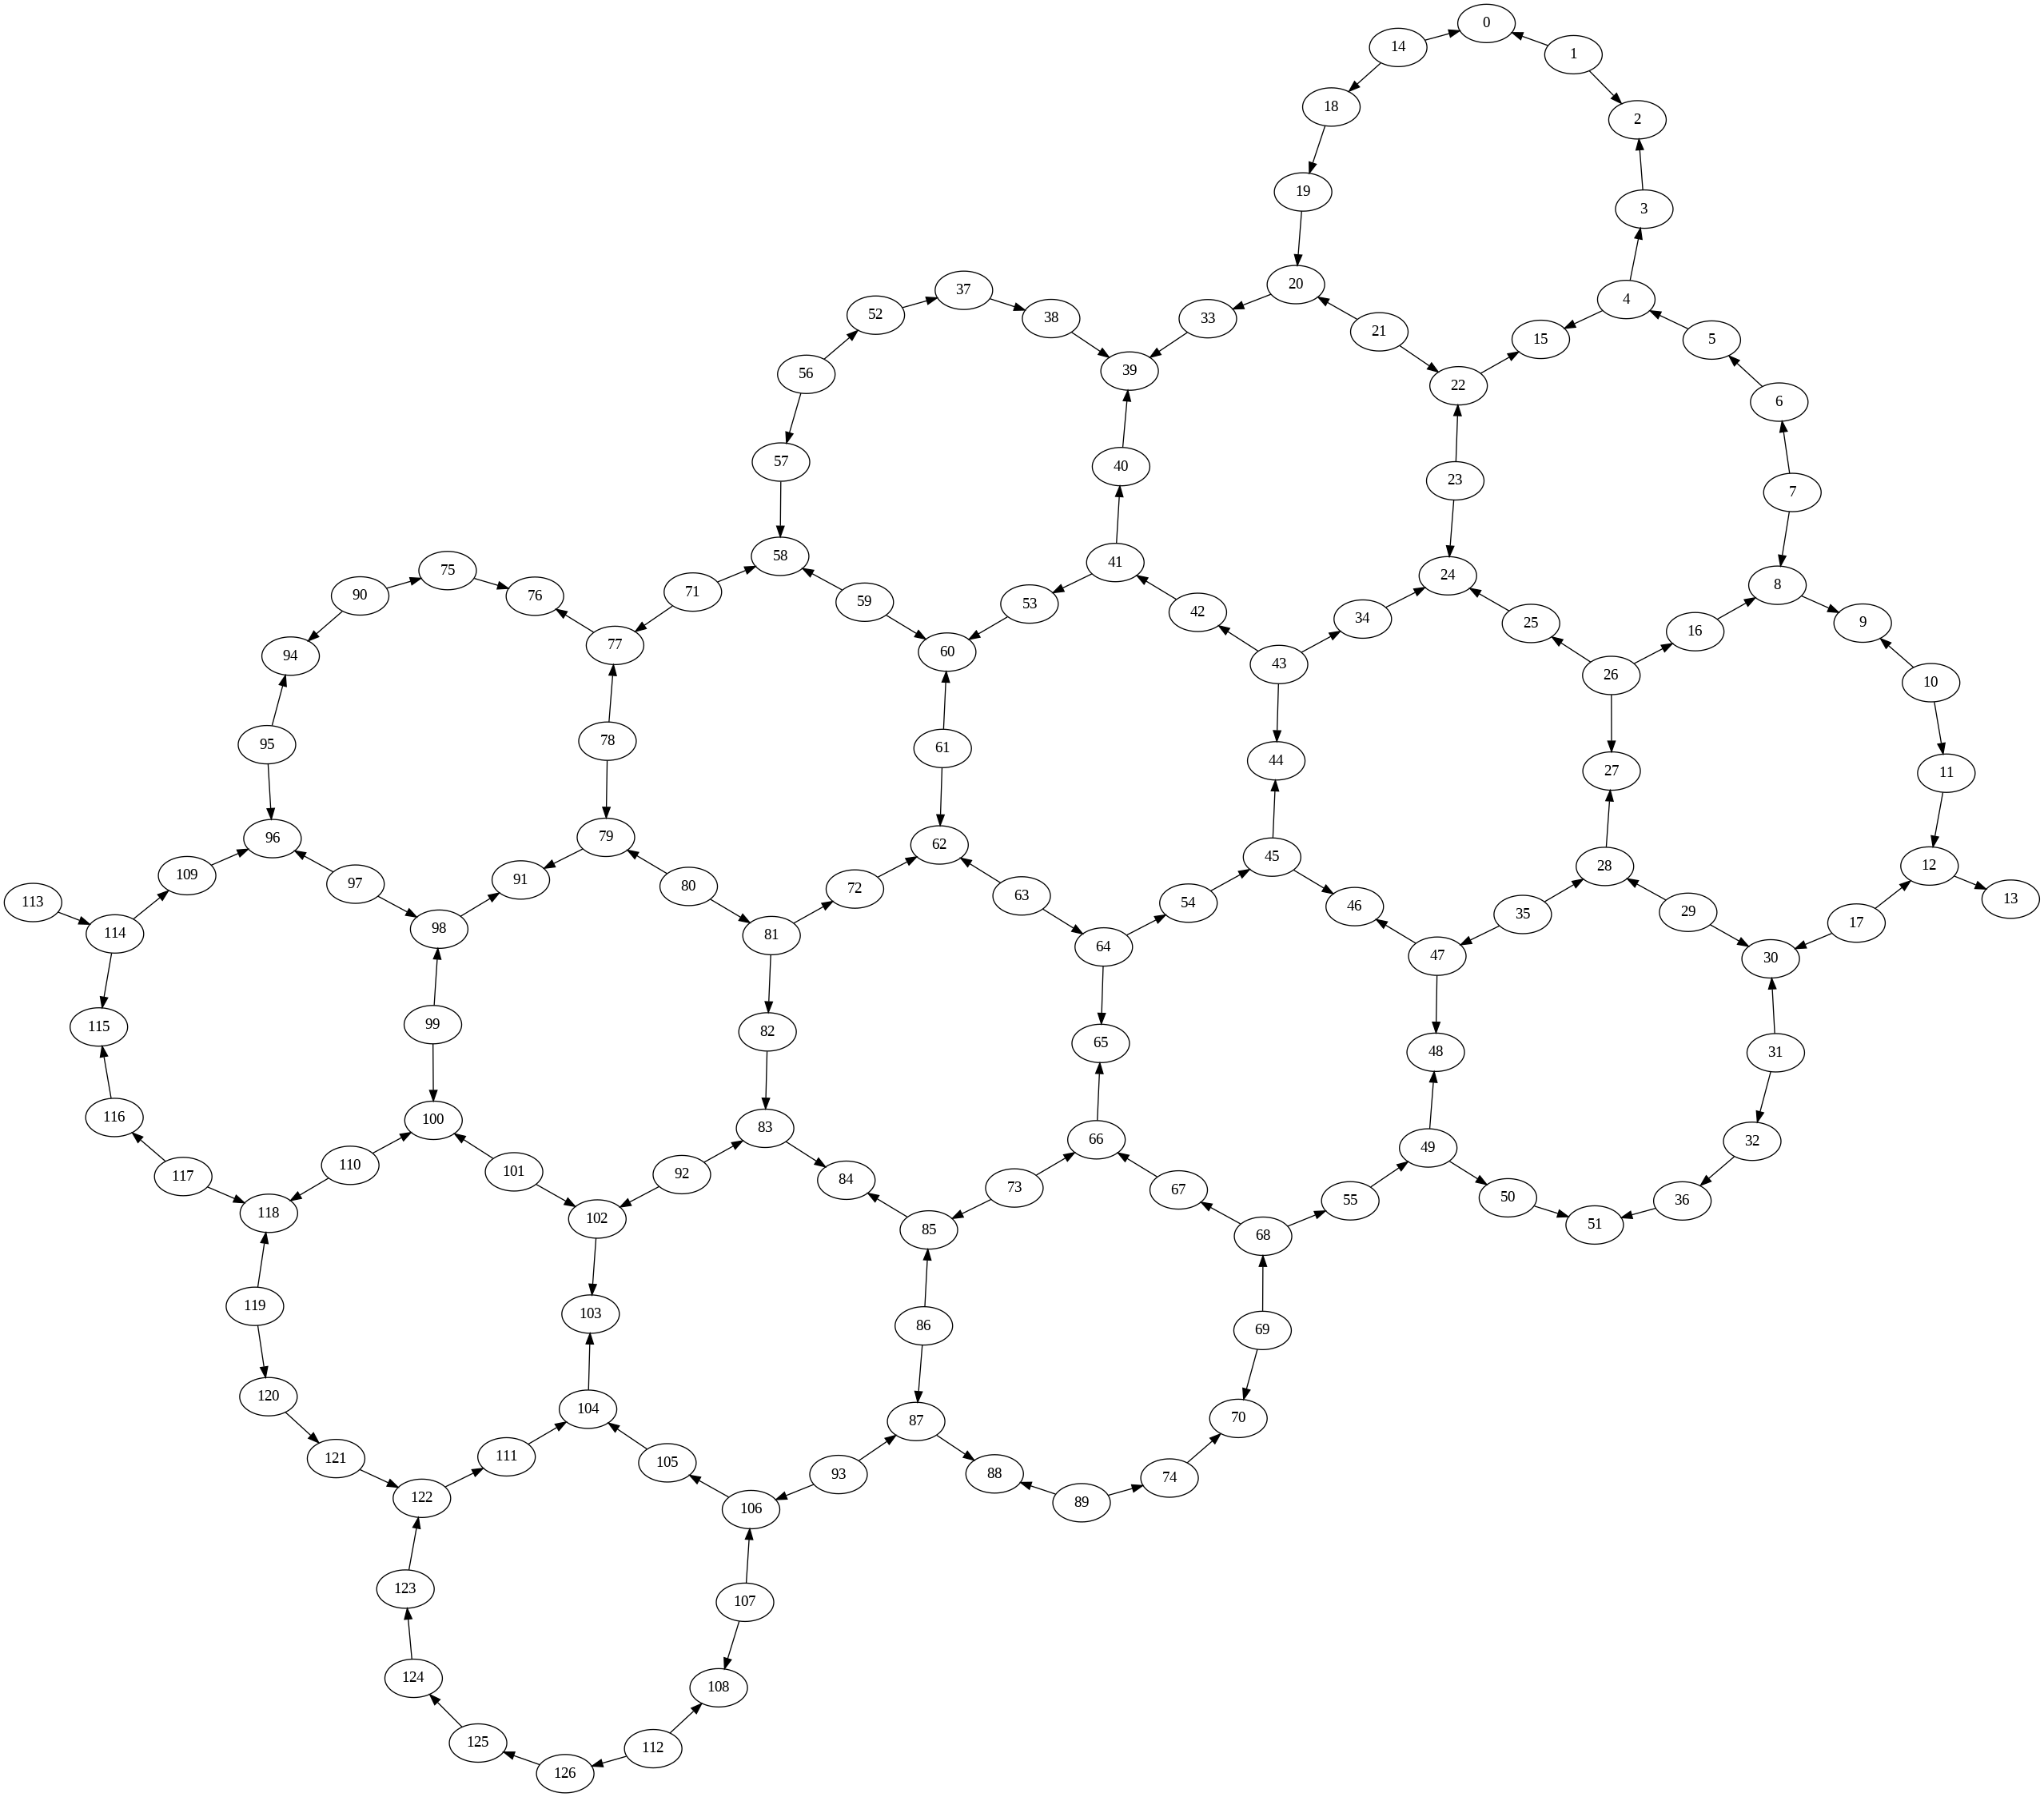

In [58]:
backend.coupling_map.draw()

## Step 1: Map the problem to a quantum-native format.

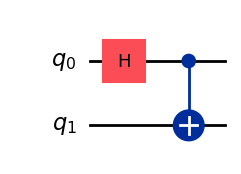

In [59]:
from qiskit import QuantumCircuit

n_qubits = 2

# Create a new circuit with two qubits
qc = QuantumCircuit(n_qubits)

# Add a Hadamard gate to qubit 0
qc.h(0)

# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)


# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")

## Step 2: Transpile the circuits: Logical to Physical Mapping

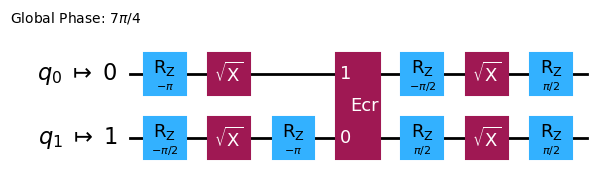

In [60]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService

# If you have not previously saved your credentials, follow instructions at
# https://docs.quantum.ibm.com/guides/setup-channel#iqp
# to authenticate with your API token.

service = QiskitRuntimeService(channel="ibm_quantum", token=API_Token)

backend = service.least_busy(simulator=False, operational=True)

# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)

isa_circuit.draw("mpl", idle_wires=False)

In [61]:
print(
    f"Name: {backend.name}\n"
    f"Version: {backend.version}\n"
    f"No. of qubits: {backend.num_qubits}\n"
)

Name: ibm_brisbane
Version: 2
No. of qubits: 127



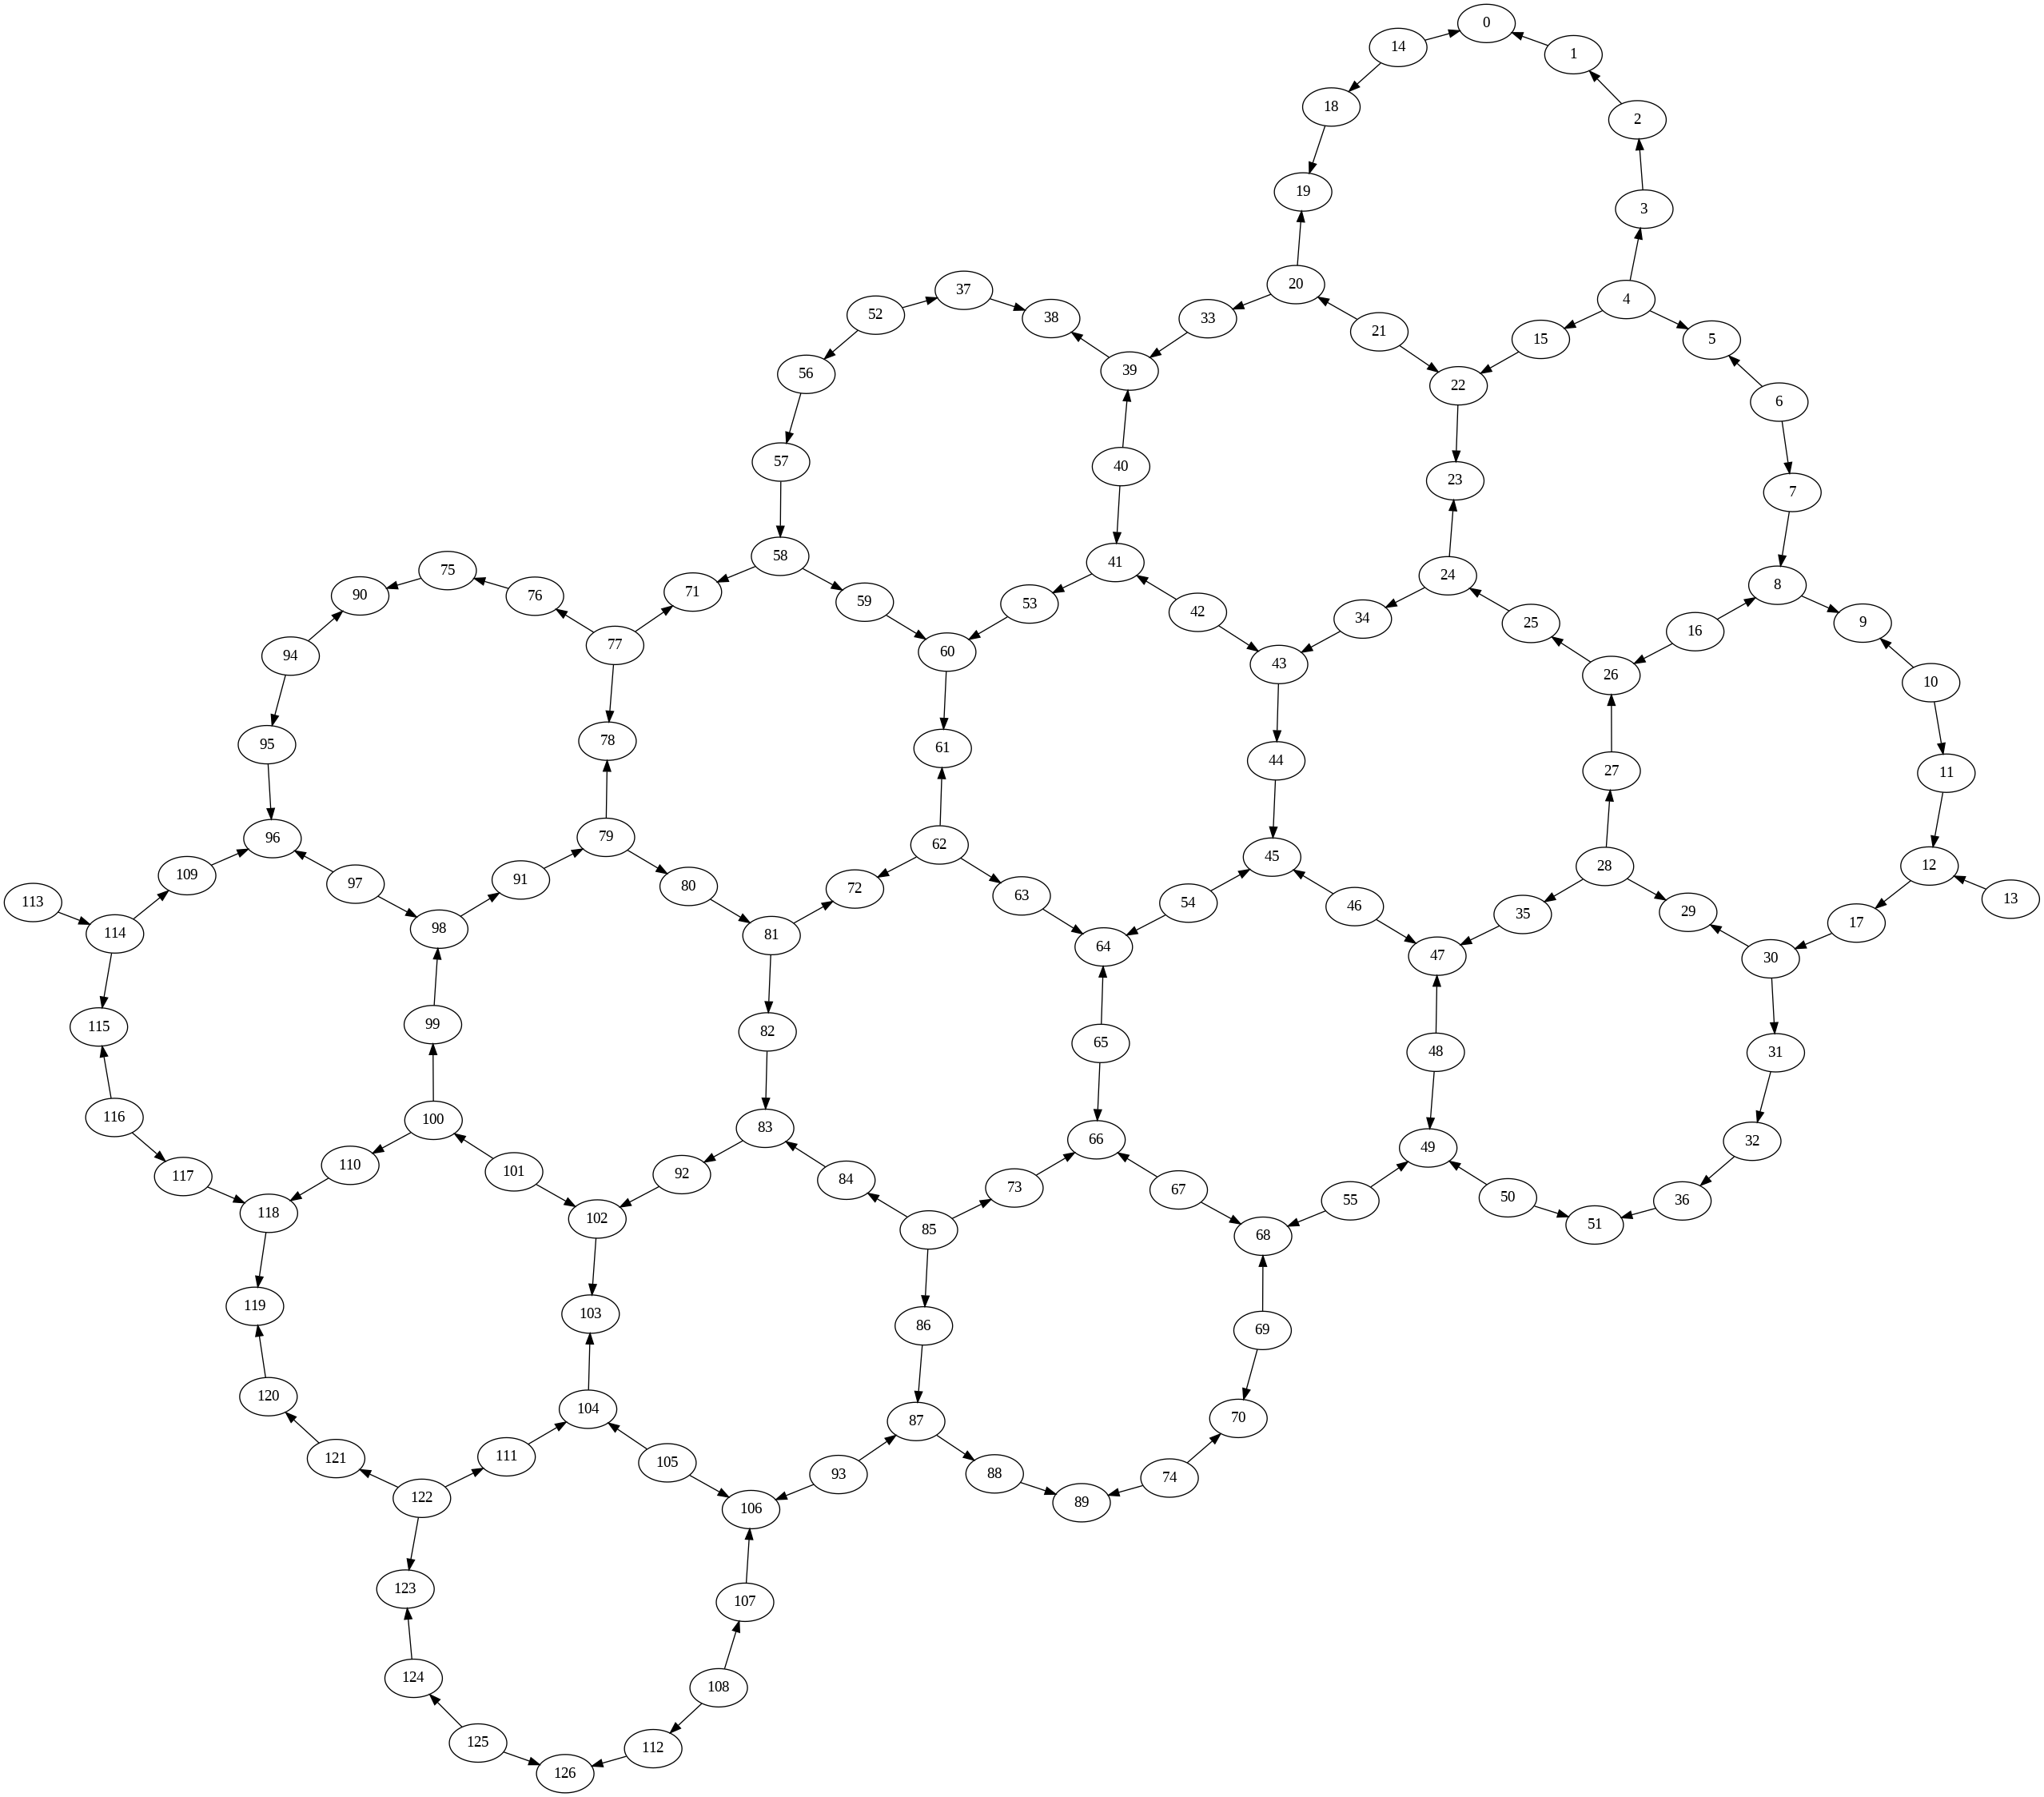

In [62]:
backend.coupling_map.draw()

## Step3: Execute using a quantum primitive function -- Estimate the Average Value

In [ ]:
# Construct the Estimator instance.

estimator = Estimator(mode=backend)
estimator.options.resilience_level = 1
estimator.options.default_shots = 5000

mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]

# One pub, with one circuit to run against five different observables.
job = estimator.run([(isa_circuit, mapped_observables)])

# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

>>> Job ID: cxeasvq3ej4g008fxf1g


## Exercise: Draw a Graph by changing the shots

## Step 4: Analyze the results.

In [ ]:
# This is the result of the entire submission.  You submitted one Pub,
# so this contains one inner result (and some metadata of its own).
job_result = job.result()

# This is the result from our single pub, which had six observables,
# so contains information on all six.
pub_result = job.result()[0]

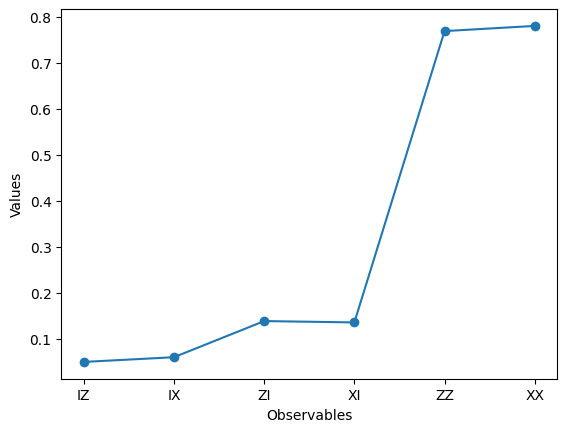

In [ ]:
# Plot the result

from matplotlib import pyplot as plt

values = pub_result.data.evs

errors = pub_result.data.stds

# plotting graph
plt.plot(observables_labels, values, "-o")
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()

# Index Advisors on Quantum Platforms

## Utility Functions

In [65]:
import json

In [66]:
# Different Problem Instances
def get_problem_instance(problem_id):
    inst_obj = dict()

    if problem_id == 41:
        inst_obj['weights'] =  [2, 4, 6, 7]
        inst_obj['profits'] = [6, 10, 12, 13]
        inst_obj['max_wgt'] = 11
        inst_obj['details'] = 'Index Selection Problem instance of size 4'
        inst_obj['name'] = 'IS_4_1'
    elif problem_id == 42:
        inst_obj['weights'] =  [6, 5, 9, 7]
        inst_obj['profits'] = [9, 11, 13, 15]
        inst_obj['max_wgt'] = 20
        inst_obj['details'] = 'Index Selection Problem instance of size 4'
        inst_obj['name'] = 'IS_4_2'
    elif problem_id == 51:
        inst_obj['weights'] =  [12, 7, 11, 8, 9]
        inst_obj['profits'] = [24, 13, 23, 15, 16]
        inst_obj['max_wgt'] = 26
        inst_obj['details'] = 'Index Selection Problem instance of size 5'
        inst_obj['name'] = 'IS_5_1'
    elif problem_id == 52:
        inst_obj['weights'] =  [7, 6, 4, 2, 1]
        inst_obj['profits'] = [14, 12, 10, 8, 3]
        inst_obj['max_wgt'] = 19
        inst_obj['details'] = 'Index Selection Problem instance of size 5'
        inst_obj['name'] = 'IS_5_2'
    elif problem_id == 53: # Real CDB I5 for SQIA
        inst_obj['profits'] = [17742, 17742, 17742, 17742, 159061]
        inst_obj['weights'] = [18, 1, 22, 1, 266]
        inst_obj['max_wgt'] = 268
        inst_obj['details'] = 'Index Selection Problem instance of size 5'
        inst_obj['name'] = 'IS_5_3'
    elif problem_id == 61:
        inst_obj['weights'] =  [7, 6, 4, 2, 1, 7]
        inst_obj['profits'] = [14, 12, 10, 8, 3, 13]
        inst_obj['max_wgt'] = 19
        inst_obj['details'] = 'Index Selection Problem instance of size 6'
        inst_obj['name'] = 'IS_6_1'
    elif problem_id == 71:
        inst_obj['weights'] = [31, 10, 20, 19, 4, 3, 6]
        inst_obj['profits'] = [70, 20, 39, 37, 7, 5, 10]
        inst_obj['max_wgt'] = 50
        inst_obj['details'] = 'Index Selection Problem instance of size 7'
        inst_obj['name'] = 'IS_7_1'
    elif problem_id == 72:
        inst_obj['weights'] =  [7, 6, 4, 2, 1, 7, 7]
        inst_obj['profits'] = [14, 12, 10, 8, 3, 13, 12]
        inst_obj['max_wgt'] = 19
        inst_obj['details'] = 'Index Selection Problem instance of size 7'
        inst_obj['name'] = 'IS_7_2'
    elif problem_id == 73: # Original CDB I7
        inst_obj['weights'] =  [266, 232, 8, 132, 199, 2, 9]
        inst_obj['profits'] = [165811, 178871, 1213770, 1213770, 1213770, 44370, 44370]
        inst_obj['max_wgt'] = 140
        inst_obj['details'] = 'Index Selection Problem instance of size 7'
        inst_obj['name'] = 'IS_7_3'
    elif problem_id == 74: # Dummy CDB I7 for SQIA
        inst_obj['profits'] = [4, 5, 27, 27, 27, 1, 1]
        inst_obj['weights'] = [126, 114, 3, 72, 95, 1, 4]
        inst_obj['max_wgt'] = 75
        inst_obj['details'] = 'Index Selection Problem instance of size 7'
        inst_obj['name'] = 'IS_7_4'
    elif problem_id == 91: # Real CDB I9 for OQIA
        inst_obj['profits'] = [229186, 229186, 229186, 229186, 229186, 229186, 229186, 229186, 5713389]
        inst_obj['weights'] = [1, 1, 1, 18, 5, 22, 1, 1, 266]
        inst_obj['max_wgt'] = 268
        inst_obj['details'] = 'Index Selection Problem instance of size 9'
        inst_obj['name'] = 'IS_9_1'
    elif problem_id == 292: # Reduced CDB I9 for SQIA
        inst_obj['profits'] = [5, 5, 5, 5, 5, 5, 5, 5, 125]
        inst_obj['weights'] = [1, 1, 1, 18, 5, 22, 1, 1, 266]
        inst_obj['max_wgt'] = 268
        inst_obj['details'] = 'Index Selection Problem instance of size 9'
        inst_obj['name'] = 'IS_9_2'
    elif problem_id == 271: # Real CDB I34 for OQIA
        inst_obj['profits'] = [31535, 31535, 31535, 31535, 493413, 20154, 20154, -174364, -174364, 14750,14750, 37821, 37821, 37821, 6044, 6044, 0, 0, 0, 6859, 6859, 6859, 6859, 6859, 577, 577, 577]
        inst_obj['weights'] = [1, 1, 18, 22, 266, 165, 8, 42, 4, 1, 25, 207, 33, 36, 17, 13, 3, 7, 14, 13, 18, 1, 1, 132, 125, 50, 7]
        inst_obj['max_wgt'] = 268
        inst_obj['details'] = 'Index Selection Problem instance of size 27'
        inst_obj['name'] = 'IS_27_1'
    elif problem_id > 4 and problem_id < 20: # Simulated instances of larger index sizes
        inst_obj['weights'] =  [7, 6, 4, 2, 1, 7, 7]
        inst_obj['profits'] = [14, 12, 10, 8, 3, 13, 12]
        # Creating instances with same solution, but larger index size
        for i in range(problem_id - 7):
            inst_obj['weights'].append(7)
            inst_obj['profits'].append(12)
        inst_obj['max_wgt'] = 19
        inst_obj['details'] = 'Synthetic Index Selection Problem instance'
        inst_obj['name'] = 'IS_'+str(problem_id)
    else:
        print('Invalid Problem ID. Currently Acceptable Ids are >4 only')
    return inst_obj

In [67]:
def populate_prob_instance(inst_obj):
    global problems
    problems[1] = inst_obj # Adding the problem instance in the problems dict
    return problems

In [68]:
def add_optimal():
    global problems

    for p in problems.keys():
        opt_val, opt_in = opt_knapSack(problems[p]['max_wgt'], problems[p]['weights'], problems[p]['profits'], len(problems[p]['profits']))
        opt_val_dict = dict()

        opt_val_dict['opt_val'] = opt_val
        opt_val_dict['opt_index'] = sorted(opt_in)
        opt_val_dict['opt_wt'] = sum([problems[p]['weights'][x] for x in opt_val_dict['opt_index']])
        problems[p]['opt_sol'] = opt_val_dict

In [70]:
def opt_knapSack(W, wt, val, n):
    final_list = []
    final_val = 0
    K = [[0 for w in range(W + 1)]
            for i in range(n + 1)]

    # Build table K[][] in bottom
    # up manner
    for i in range(n + 1):
        for w in range(W + 1):
            if i == 0 or w == 0:
                K[i][w] = 0
            elif wt[i - 1] <= w:
                K[i][w] = max(val[i - 1]
                  + K[i - 1][w - wt[i - 1]],
                               K[i - 1][w])
            else:
                K[i][w] = K[i - 1][w]

    # stores the result of Knapsack
    res = K[n][W]
    final_val = res

    w = W
    for i in range(n, 0, -1):
        if res <= 0:
            break
        # either the result comes from the
        # top (K[i-1][w]) or from (val[i-1]
        # + K[i-1] [w-wt[i-1]]) as in Knapsack
        # table. If it comes from the latter
        # one/ it means the item is included.
        if res == K[i - 1][w]:
            continue
        else:

            # This item is included.
            final_list.append(i-1)

            # Since this weight is included
            # its value is deducted
            res = res - val[i - 1]
            w = w - wt[i - 1]

    return final_val, final_list

In [71]:
def add_greedy():
    global problems

    greedy_res = {}
    for k in problems:
        greedy_indexes, greedy_wgts = greedy_roi(k)
        greedy_profit = sum([problems[k]['profits'][i] for i in greedy_indexes])
        opt_indexes =  problems[k]['opt_sol']['opt_index']
        opt_profit = sum([problems[k]['profits'][i] for i in opt_indexes])
        opt_weight = sum([problems[k]['weights'][i] for i in opt_indexes])

        inst_dict = dict()
        inst_dict['greedy_ind'] = sorted(greedy_indexes)
        inst_dict['greedy_weight'] = greedy_wgts
        inst_dict['greedy_profit'] = greedy_profit
        inst_dict['isOptimal'] = sorted(greedy_indexes) == sorted(opt_indexes)
        greedy_res[k] = inst_dict
        problems[k]['greedy_sol'] = inst_dict
    return greedy_res

In [72]:
def greedy_roi(cur_prob):
    vals = problems[cur_prob]['profits']
    wgts = problems[cur_prob]['weights']
    max_wgt = problems[cur_prob]['max_wgt']
    v_w_r = { i: vals[i]/wgts[i] for i  in range(len(vals))}
    v_w_r_sorted = sorted(v_w_r.items(), key=lambda x:x[1], reverse=True)
    final_set = []
    total_wt = 0
    for k,v in v_w_r_sorted:
        if total_wt <= max_wgt and wgts[k] + total_wt <= max_wgt:
            final_set.append(k)
            total_wt += wgts[k]
    return final_set, total_wt

In [73]:
def persist_json_file(data, res_file):
    '''
    Just to persist any json file
    '''

    json_object = json.dumps(data, indent=4, cls=NpEncoder)

    with open(res_file, "w") as outfile:
        outfile.write(json_object)

    print('Data Saved')

In [74]:
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer) or isinstance(obj, np.int64):
            return int(obj)
        if isinstance(obj, np.complex128):
            return obj.real
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)

In [75]:
from docplex.mp.model import Model
from qiskit_optimization.problems.quadratic_program import QuadraticProgram
from qiskit_optimization.translators import from_docplex_mp
from qiskit_optimization.algorithms import OptimizationResult

from typing import List, Union
import numpy as np

In [76]:
# !pip install docplex --target /content/drive/MyDrive/cods_comad_packages
# !pip install qiskit_optimization --target /content/drive/MyDrive/cods_comad_packages


In [77]:
# Convert the Index Selection Problem Instance into Quadratic Program
class Index_Selection_Instance():

    def __init__(self, values: List[int], weights: List[int], max_weight: int, instance_name: str) -> None:
        """
        Args:
            values: A list of the values of items
            weights: A list of the weights of items
            max_weight: The maximum weight capacity
        """
        self._values = values
        self._weights = weights
        self._max_weight = max_weight
        self._instance_name = instance_name

    def to_quadratic_program(self) -> QuadraticProgram:
        """Convert a knapsack problem instance into a
        :class:`~qiskit_optimization.problems.QuadraticProgram`

        Returns:
            The :class:`~qiskit_optimization.problems.QuadraticProgram` created
            from the knapsack problem instance.
        """
        mdl = Model(name=self._instance_name)
        x = {i: mdl.binary_var(name=f"x_{i}") for i in range(len(self._values))}
        mdl.maximize(mdl.sum(self._values[i] * x[i] for i in x))
        mdl.add_constraint(mdl.sum(self._weights[i] * x[i] for i in x) <= self._max_weight)
        op = from_docplex_mp(mdl)
        return op

    def interpret(self, result: Union[OptimizationResult, np.ndarray]) -> List[int]:
        """Interpret a result as item indices

        Args:
            result : The calculated result of the problem

        Returns:
            A list of items whose corresponding variable is 1
        """
        x = self._result_to_x(result)
        return [i for i, value in enumerate(x) if value]

    def _result_to_x(self, result: Union[OptimizationResult, np.ndarray]) -> np.ndarray:
        if isinstance(result, OptimizationResult):
            x = result.x
        elif isinstance(result, np.ndarray):
            x = result
        else:
            raise TypeError(
                "Unsupported format of result. Provide an　OptimizationResult or a",
                f" binary array using np.ndarray instead of {type(result)}",
            )
        return x

## OQIA

In [ ]:
# Select the problem instance
prob_id = 42

problems = dict()

inst_obj = get_problem_instance(prob_id)

populate_prob_instance(inst_obj)

# Find the Optimal Solution
add_optimal()

# Find the Greedy Solution
add_greedy()

# Populated Problem Instance
problems

In [ ]:
# Index Selection Algorithm -- OQIA or SQIA
index_selection_algo = 'OQIA'

# Base Location of all result file
base_path = 'oqia_V1'

# OQIA Parameters
quantum_algo = 'qaoa'  # Select quantum algorithm
p = 1 # Current p value to try
p_min = 1
p_max = 3 # Maximum p value to try
is_inc_p = False # Whether to increment p and try


# Quantum Parameters
shots = 1000 # Default value of shots
max_shots = 10000 # Maximum values of shots
inc_size = 1000 # Step size of shots increment
is_inc_shots = False #Try increment shots
repeat = 10 # Number of repeatations of the whole experiment

# Quantum Machine
is_simulator = True  # Select a simulator or a real hardware
is_noisy = False # Noise status of the selected machine
quantum_machine = 'Aer' # Select a quantum simulator or a Real Hardware
# quantum_machine = 'FakeAlmadenV2' # Select a noisy simulator
# quantum_machine = 'ibm_sherbrooke' # Select a quantum real hardware

# Real Hardware Config
is_least_busy = True # Select the least busy quantum machine
# API_KEY = '<>'

In [ ]:
# Instantiate the Result Directory
filepath = os.path.join('/content/drive/MyDrive/Cods_Comad/Results', index_selection_algo, base_path)
os.makedirs(filepath, exist_ok = True)
print("Directory '%s' created successfully" %filepath)

In [ ]:
import json
problem_file = os.path.join(filepath, 'problem.json')
persist_json_file(problems, problem_file)

In [ ]:
cur_prob = 1
vals = problems[cur_prob]['profits']
wgts = problems[cur_prob]['weights']
max_wgt = problems[cur_prob]['max_wgt']
inst_name = problems[cur_prob]['name']

In [ ]:
inst_name

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/MyDrive/Tutorial/Images/oqia.png')
plt.figure(figsize=(12, 10))  # Adjust these values as needed
plt.imshow(img)
plt.axis('off')  # Optional: To remove axis labels
plt.show()

In [ ]:
# Create the Quadratic Program
prob = Index_Selection_Instance(values=vals, weights=wgts, max_weight=max_wgt, instance_name=inst_name)
qp = prob.to_quadratic_program()

In [ ]:
print(qp.export_as_lp_string())

In [ ]:
# From Quadratic Program To QUBO
from qiskit_optimization.converters import QuadraticProgramToQubo
qp2qubo = QuadraticProgramToQubo()
qubo = qp2qubo.convert(qp)
print(qubo.export_as_lp_string())

In [ ]:
# From QUBO To Ising Hamiltonian
cost_hamiltonian, offset = qubo.to_ising()
print('Offset:', offset)
print('Ising Hamiltonian:')
print(str(cost_hamiltonian))

## QAOA using AER Simulator

In [ ]:
from qiskit.circuit.library import QAOAAnsatz

circuit = QAOAAnsatz(cost_operator=cost_hamiltonian, reps=1)
circuit.measure_all()

circuit.draw('mpl')

In [ ]:
# Convert to an ISA circuit and layout-mapped observables.

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator


aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
candidate_circuit = pm.run(circuit)

candidate_circuit.draw("mpl", idle_wires=False)

In [ ]:
initial_gamma = np.pi
initial_beta = np.pi/2
init_params = [initial_gamma, initial_beta]

In [ ]:
def cost_func_estimator(params, ansatz, hamiltonian, estimator):

    # transform the observable defined on virtual qubits to
    # an observable defined on all physical qubits
    isa_hamiltonian = hamiltonian.apply_layout(ansatz.layout)

    pub = (ansatz, isa_hamiltonian, params)
    job = estimator.run([pub])

    results = job.result()[0]
    cost = results.data.evs

    objective_func_vals.append(cost)


    return cost

In [ ]:
from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator
from scipy.optimize import minimize

objective_func_vals = [] # Global variable
with Session(backend=aer_sim) as session:
    # If using qiskit-ibm-runtime<0.24.0, change `mode=` to `session=`
    estimator = Estimator(mode=session)
    estimator.options.default_shots = 1000

    # Set simple error suppression/mitigation options
    # estimator.options.dynamical_decoupling.enable = True
    # estimator.options.dynamical_decoupling.sequence_type = "XY4"
    # estimator.options.twirling.enable_gates = True
    # estimator.options.twirling.num_randomizations = "auto"

    result = minimize(
        cost_func_estimator,
        init_params,
        args=(candidate_circuit, cost_hamiltonian, estimator),
        method="COBYLA",
        tol=1e-2,
    )
    print(result)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(len(objective_func_vals)), objective_func_vals, 'o', markersize=8)  # Plot as dots

# Annotate each point with its energy value
for i, val in enumerate(objective_func_vals):
    plt.annotate(f'{val:.2f}', (i, val), textcoords="offset points", xytext=(0,10), ha='center')

plt.xticks(range(len(objective_func_vals))) # Ensure all x-axis values are shown as integers
plt.xlabel("Iteration")
plt.ylabel("Energy")

# Beautify the plot (adjust as needed)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.ylim(min(objective_func_vals) - 1, max(objective_func_vals) + 1) # Add some padding to y-axis

plt.show()

Once we have found the optimal parameters for the circuit, we can assign these parameters and sample the final distribution obtained with the optimized parameters. Here is where the Sampler primitive should be used since it is the probability distribution of bitstring measurements which correspond to the optimal cut of the graph.

In [ ]:
optimized_circuit = candidate_circuit.assign_parameters(result.x)
optimized_circuit.draw('mpl', fold=False, idle_wires=False)

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

# If using qiskit-ibm-runtime<0.24.0, change `mode=` to `backend=`
sampler = Sampler(mode=aer_sim)
sampler.options.default_shots = 10000

# Set simple error suppression/mitigation options
# sampler.options.dynamical_decoupling.enable = True
# sampler.options.dynamical_decoupling.sequence_type = "XY4"
# sampler.options.twirling.enable_gates = True
# sampler.options.twirling.num_randomizations = "auto"

pub= (optimized_circuit, )
job = sampler.run([pub], shots=1000)
counts_int = job.result()[0].data.meas.get_int_counts()
counts_bin = job.result()[0].data.meas.get_counts()
shots = sum(counts_int.values())

In [ ]:
keys = list(counts_bin.keys())
values = list(counts_bin.values())
most_likely = keys[np.argmax(np.abs(values))]
most_likely = most_likely[::-1]
result_data = [int(digit) for digit in most_likely]
solution = [i for i, value in enumerate(result_data) if (value and i < len(vals)) ]

In [ ]:
print("Quantum Recommended Index Configuration:")
print(f"- Indices: {solution}")
print(f"- Total Cost: {sum([wgts[i] for i in solution])}")
print(f"- Total Benefit: {sum([vals[i] for i in solution])}")

print("\nGreedy Index Configuration:")
print(f"- Indices: {problems[1]['greedy_sol']['greedy_ind']}")
print(f"- Total Cost: {problems[1]['greedy_sol']['greedy_weight']}")
print(f"- Total Benefit: {problems[1]['greedy_sol']['greedy_profit']}")

print("\nOptimal Index Configuration:")
print(f"- Indices: {problems[1]['opt_sol']['opt_index']}")
print(f"- Total Cost: {problems[1]['opt_sol']['opt_wt']}")
print(f"- Total Benefit: {problems[1]['opt_sol']['opt_val']}")

## Run on Noisy Simulator

In [ ]:
from qiskit.circuit.library import QAOAAnsatz

circuit = QAOAAnsatz(cost_operator=cost_hamiltonian, reps=1)
circuit.measure_all()

circuit.draw('mpl')

In [ ]:
# Use the following code instead if you want to run on a simulator:

from qiskit_ibm_runtime import EstimatorV2 as Estimator

from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2
backend = FakeAlmadenV2()
estimator = Estimator(backend)

In [ ]:
# Convert to an ISA circuit and layout-mapped observables.

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
candidate_circuit = pm.run(circuit)

candidate_circuit.draw("mpl", idle_wires=False)

In [ ]:
initial_gamma = np.pi
initial_beta = np.pi/2
init_params = [initial_gamma, initial_beta]

In [ ]:
def cost_func_estimator(params, ansatz, hamiltonian, estimator):

    # transform the observable defined on virtual qubits to
    # an observable defined on all physical qubits
    isa_hamiltonian = hamiltonian.apply_layout(ansatz.layout)

    pub = (ansatz, isa_hamiltonian, params)
    job = estimator.run([pub])

    results = job.result()[0]
    cost = results.data.evs

    objective_func_vals.append(cost)


    return cost

In [ ]:
from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator
from scipy.optimize import minimize

objective_func_vals = [] # Global variable
with Session(backend=backend) as session:
    # If using qiskit-ibm-runtime<0.24.0, change `mode=` to `session=`
    estimator = Estimator(mode=session)
    estimator.options.default_shots = 1000

    # Set simple error suppression/mitigation options
    # estimator.options.dynamical_decoupling.enable = True
    # estimator.options.dynamical_decoupling.sequence_type = "XY4"
    # estimator.options.twirling.enable_gates = True
    # estimator.options.twirling.num_randomizations = "auto"

    result = minimize(
        cost_func_estimator,
        init_params,
        args=(candidate_circuit, cost_hamiltonian, estimator),
        method="COBYLA",
        tol=1e-2,
    )
    print(result)

In [ ]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 6))
# plt.plot(objective_func_vals)
# plt.xlabel("Iteration")
# plt.ylabel("Cost")
# plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(len(objective_func_vals)), objective_func_vals, 'o', markersize=8)  # Plot as dots

# Annotate each point with its energy value
for i, val in enumerate(objective_func_vals):
    plt.annotate(f'{val:.2f}', (i, val), textcoords="offset points", xytext=(0,10), ha='center')

plt.xticks(range(len(objective_func_vals))) # Ensure all x-axis values are shown as integers
plt.xlabel("Iteration")
plt.ylabel("Energy")

# Beautify the plot (adjust as needed)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.ylim(min(objective_func_vals) - 1, max(objective_func_vals) + 1) # Add some padding to y-axis

plt.show()

In [ ]:
optimized_circuit = candidate_circuit.assign_parameters(result.x)
optimized_circuit.draw('mpl', fold=False, idle_wires=False)

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

# If using qiskit-ibm-runtime<0.24.0, change `mode=` to `backend=`
sampler = Sampler(mode=backend)
sampler.options.default_shots = 10000

# Set simple error suppression/mitigation options
# sampler.options.dynamical_decoupling.enable = True
# sampler.options.dynamical_decoupling.sequence_type = "XY4"
# sampler.options.twirling.enable_gates = True
# sampler.options.twirling.num_randomizations = "auto"

pub= (optimized_circuit, )
job = sampler.run([pub], shots=1000)
counts_int = job.result()[0].data.meas.get_int_counts()
counts_bin = job.result()[0].data.meas.get_counts()
shots = sum(counts_int.values())

In [ ]:
keys = list(counts_bin.keys())
values = list(counts_bin.values())
most_likely = keys[np.argmax(np.abs(values))]
most_likely = most_likely[::-1]
result_data = [int(digit) for digit in most_likely]
solution = [i for i, value in enumerate(result_data) if (value and i < len(vals)) ]

In [ ]:
print("Quantum Recommended Index Configuration:")
print(f"- Indices: {solution}")
print(f"- Total Cost: {sum([wgts[i] for i in solution])}")
print(f"- Total Benefit: {sum([vals[i] for i in solution])}")

print("\nGreedy Index Configuration:")
print(f"- Indices: {problems[1]['greedy_sol']['greedy_ind']}")
print(f"- Total Cost: {problems[1]['greedy_sol']['greedy_weight']}")
print(f"- Total Benefit: {problems[1]['greedy_sol']['greedy_profit']}")

print("\nOptimal Index Configuration:")
print(f"- Indices: {problems[1]['opt_sol']['opt_index']}")
print(f"- Total Cost: {problems[1]['opt_sol']['opt_wt']}")
print(f"- Total Benefit: {problems[1]['opt_sol']['opt_val']}")

## Running on Real Hardware

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager


# QiskitRuntimeService.save_account(channel="ibm_quantum", token="<MY_IBM_QUANTUM_TOKEN>", overwrite=True, set_as_default=True)
service = QiskitRuntimeService(channel="ibm_quantum", token=API_Token)
backend = service.least_busy(min_num_qubits=127)
print(backend)

# Create pass manager for transpilation
pm = generate_preset_pass_manager(optimization_level=3,
                                    backend=backend)

candidate_circuit = pm.run(circuit)
candidate_circuit.draw('mpl', fold=False, idle_wires=False)

In [ ]:
initial_gamma = np.pi
initial_beta = np.pi/2
init_params = [initial_gamma, initial_beta]

In [ ]:
def cost_func_estimator(params, ansatz, hamiltonian, estimator):

    # transform the observable defined on virtual qubits to
    # an observable defined on all physical qubits
    isa_hamiltonian = hamiltonian.apply_layout(ansatz.layout)

    pub = (ansatz, isa_hamiltonian, params)
    job = estimator.run([pub])

    results = job.result()[0]
    cost = results.data.evs

    objective_func_vals.append(cost)


    return cost

In [ ]:
from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator
from scipy.optimize import minimize

objective_func_vals = [] # Global variable
with Session(backend=backend) as session:
    # If using qiskit-ibm-runtime<0.24.0, change `mode=` to `session=`
    estimator = Estimator(mode=session)
    estimator.options.default_shots = 1000

    # Set simple error suppression/mitigation options
    # estimator.options.dynamical_decoupling.enable = True
    # estimator.options.dynamical_decoupling.sequence_type = "XY4"
    # estimator.options.twirling.enable_gates = True
    # estimator.options.twirling.num_randomizations = "auto"

    result = minimize(
        cost_func_estimator,
        init_params,
        args=(candidate_circuit, cost_hamiltonian, estimator),
        method="COBYLA",
        tol=1e-2,
    )
    print(result)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(len(objective_func_vals)), objective_func_vals, 'o', markersize=8)  # Plot as dots

# Annotate each point with its energy value
for i, val in enumerate(objective_func_vals):
    plt.annotate(f'{val:.2f}', (i, val), textcoords="offset points", xytext=(0,10), ha='center')

plt.xticks(range(len(objective_func_vals))) # Ensure all x-axis values are shown as integers
plt.xlabel("Iteration")
plt.ylabel("Energy")

# Beautify the plot (adjust as needed)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.ylim(min(objective_func_vals) - 1, max(objective_func_vals) + 1) # Add some padding to y-axis

plt.show()

In [ ]:
optimized_circuit = candidate_circuit.assign_parameters(result.x)
optimized_circuit.draw('mpl', fold=False, idle_wires=False)

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

# If using qiskit-ibm-runtime<0.24.0, change `mode=` to `backend=`
sampler = Sampler(mode=backend)
sampler.options.default_shots = 10000

# Set simple error suppression/mitigation options
# sampler.options.dynamical_decoupling.enable = True
# sampler.options.dynamical_decoupling.sequence_type = "XY4"
# sampler.options.twirling.enable_gates = True
# sampler.options.twirling.num_randomizations = "auto"

pub= (optimized_circuit, )
job = sampler.run([pub], shots=1000)
counts_int = job.result()[0].data.meas.get_int_counts()
counts_bin = job.result()[0].data.meas.get_counts()
shots = sum(counts_int.values())

In [ ]:
keys = list(counts_bin.keys())
values = list(counts_bin.values())
most_likely = keys[np.argmax(np.abs(values))]
most_likely = most_likely[::-1]
result_data = [int(digit) for digit in most_likely]
solution = [i for i, value in enumerate(result_data) if (value and i < len(vals)) ]

In [ ]:
print("Quantum Recommended Index Configuration:")
print(f"- Indices: {solution}")
print(f"- Total Cost: {sum([wgts[i] for i in solution])}")
print(f"- Total Benefit: {sum([vals[i] for i in solution])}")

print("\nGreedy Index Configuration:")
print(f"- Indices: {problems[1]['greedy_sol']['greedy_ind']}")
print(f"- Total Cost: {problems[1]['greedy_sol']['greedy_weight']}")
print(f"- Total Benefit: {problems[1]['greedy_sol']['greedy_profit']}")

print("\nOptimal Index Configuration:")
print(f"- Indices: {problems[1]['opt_sol']['opt_index']}")
print(f"- Total Cost: {problems[1]['opt_sol']['opt_wt']}")
print(f"- Total Benefit: {problems[1]['opt_sol']['opt_val']}")